In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Electricity Consumption.csv",parse_dates=["DATE"],index_col ="DATE")

In [3]:
data.rename(columns={'Electricty_Consumption_in_TW':'tw'},inplace=True)

In [4]:
data.head()

,tw
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [5]:
print(data.index.min())
print(data.index.max())

1973-01-01 00:00:00
2019-09-01 00:00:00


In [6]:
first_date = data.index.min()
last_date = data.index.max()

In [7]:
len(pd.date_range(start=first_date, end=last_date))

17045

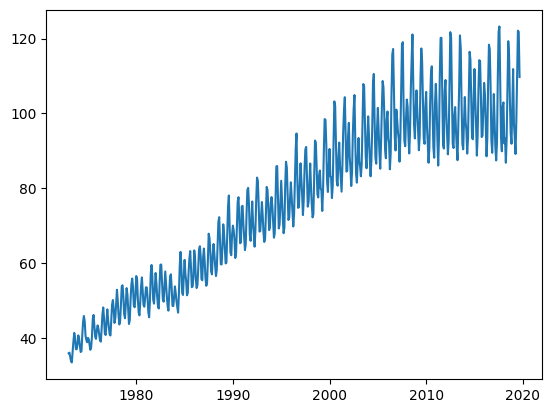

In [8]:
plt.plot(data)

In [9]:
def roll_funct(dataf,win_p):
    from statsmodels.tsa.stattools import adfuller
    #Determine Rolling Statistics
    rollmean=dataf.rolling(window=win_p).mean()
    rollstd =dataf.rolling(window=win_p).std()
    #Plot RollingStatistics
    plt.figure(figsize=(30,8))
    orig= plt.plot(dataf, color = 'blue', label = 'original')
    mean = plt.plot(rollmean, color = 'red', label = 'RollMean')
    std = plt.plot(rollstd, color = 'black', label = 'RollStd')
    
    plt.legend(loc='best')
    plt.title('Rolling Statistics')
    plt.show(block=False)

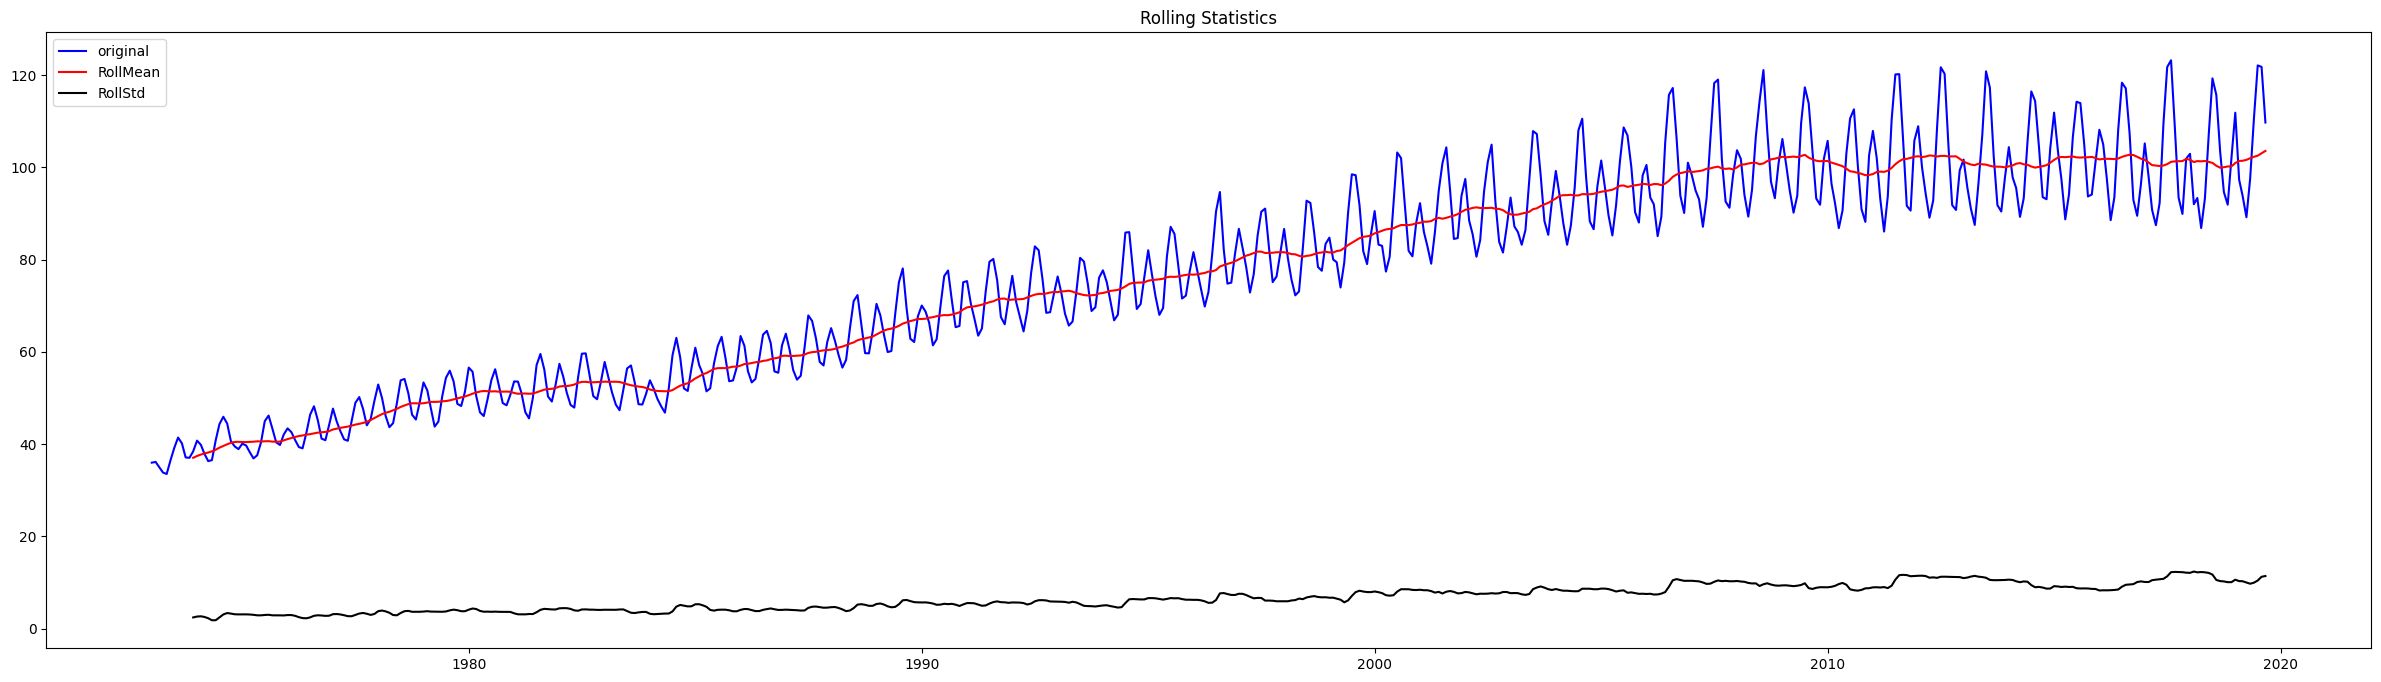

In [10]:
roll_funct(data,12)

In [20]:
from statsmodels.tsa.stattools import adfuller
    #Dickey-Fuller Test
    #print("Result for df-test is :")
    #dftest = adfuller(timeseries,autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index = ['Test Static','p-value','#LagUsed','Number of Observation Used'])
    #for key,value in dftest[4].items():
    #    dfoutput['Critical Value (%s)'%key]=value
    #print(dfoutput)   
def adftest(tseries):
    result =adfuller(tseries,autolag='AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis : Data is STATIONARY")
    else:
        print("Accept Null Hypothesis : Data is NON-STATIONARY")

In [12]:
adftest(data)

ADF Test Statistic : -1.7405933729832284
p-value : 0.41032816044687603
#Lags Used : 15
Number of Observations Used : 545
Accept Null Hypothesis : Data is NON-STATIONARY


In [13]:
year_shift = data-data.shift(12)
year_shift=year_shift.iloc[12:]

In [14]:
adftest(year_shift)

ADF Test Statistic : -6.283726159436479
p-value : 3.7419901755219934e-08
#Lags Used : 12
Number of Observations Used : 536
Reject Null Hypothesis : Data is STATIONARY


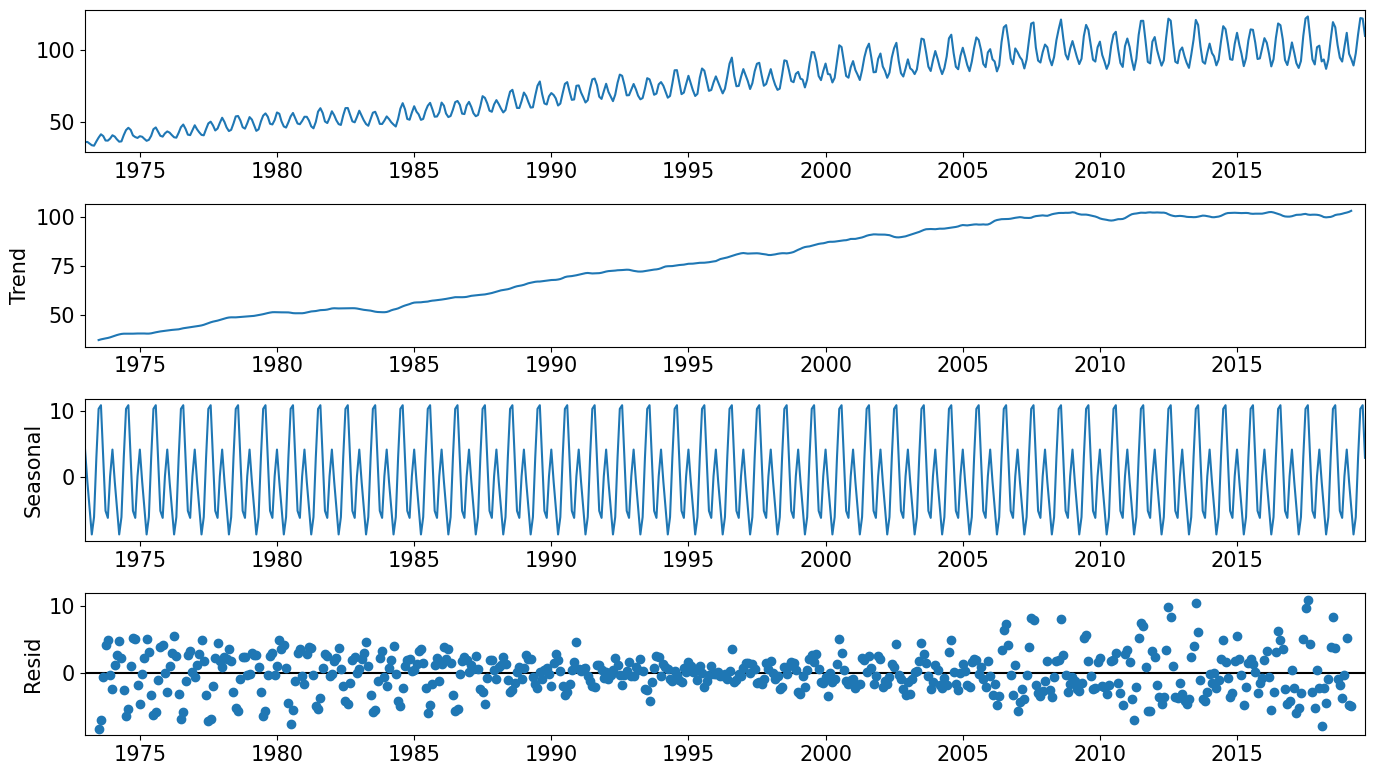

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(data,model='additive')
fig = result.plot()

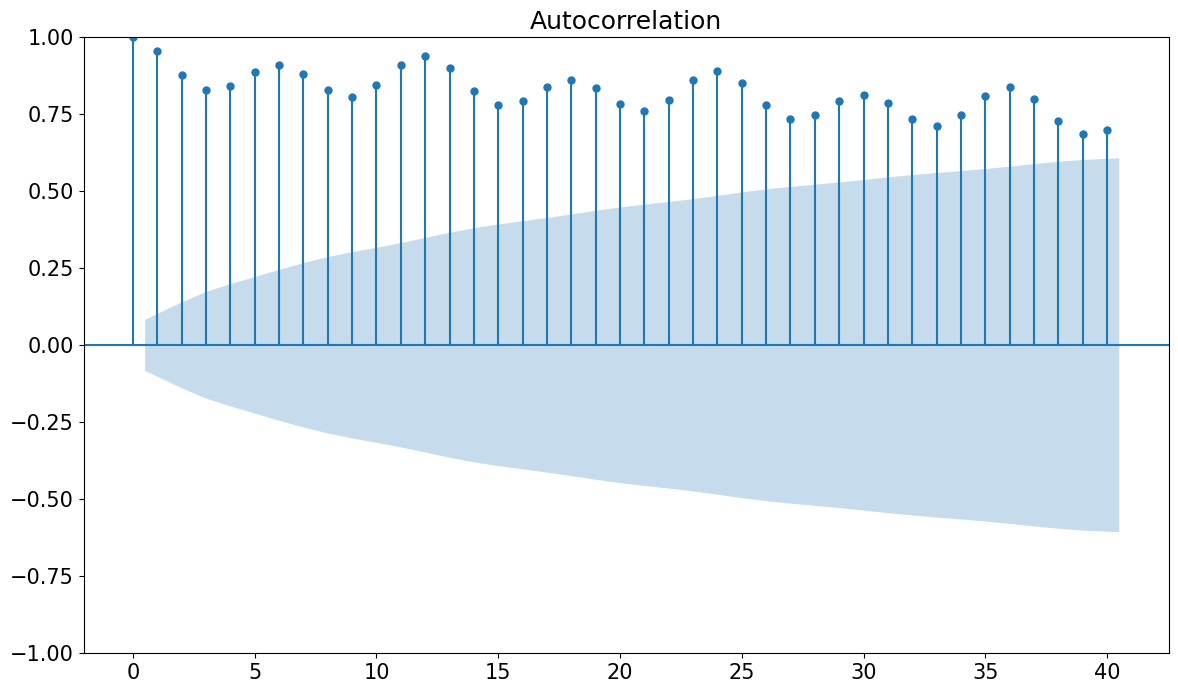

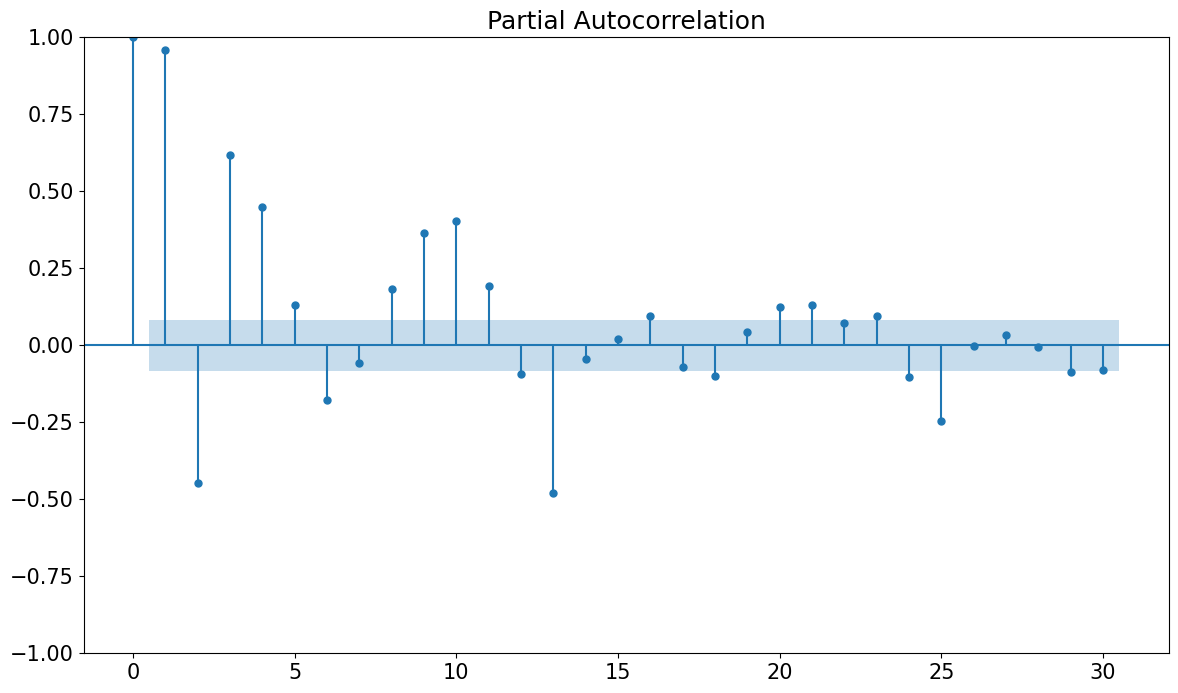

In [26]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

plot_acf(data, lags=40);
plot_pacf(data, lags=30);

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
arima = ARIMA(data['tw'], order=(12,1,1))
model=arima.fit()
predictions = model.predict(start=200,end=561)

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Program Files\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimiza

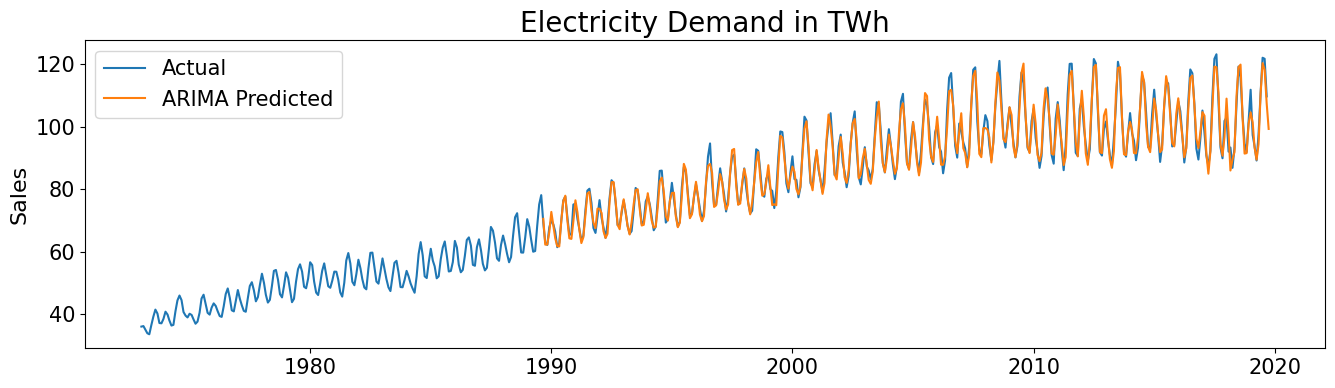

In [64]:
plt.figure(figsize=(16,4))
plt.plot(data, label="Actual")
plt.plot(predictions, label="ARIMA Predicted")
plt.title('Electricity Demand in TWh', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()


In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(data, predictions))
rmse

2.519787786518543

In [37]:
sarima = SARIMAX(data['tw'],
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
predictions2 = sarima.fit().predict()

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


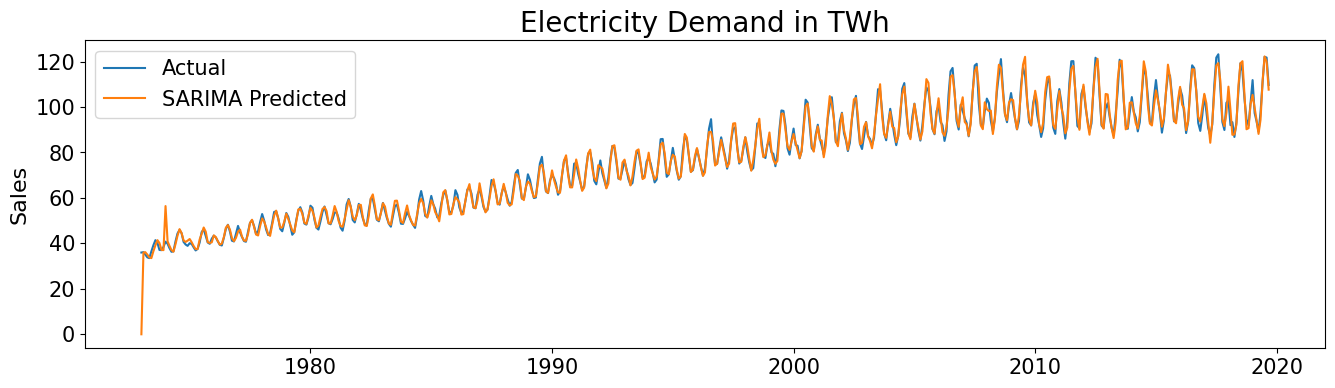

In [38]:
plt.figure(figsize=(16,4))
plt.plot(data, label="Actual")
plt.plot(predictions2, label="SARIMA Predicted")
plt.title('Electricity Demand in TWh', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()


In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(data, predictions2))
rmse

2.577953915736944

Hence for now we will use arima model as it performs better

In [67]:
# # Forecast

mydata=model.forecast(steps=50)


In [68]:
mydata

2019-10-01     99.304436
2019-11-01     97.086601
2019-12-01    105.018974
2020-01-01    112.710069
2020-02-01    102.087248
2020-03-01     95.163333
2020-04-01     91.309109
2020-05-01     98.313632
2020-06-01    111.794473
2020-07-01    121.894940
2020-08-01    120.929606
2020-09-01    109.008864
2020-10-01     98.997428
2020-11-01     97.926388
2020-12-01    105.288745
2021-01-01    111.925433
2021-02-01    104.031357
2021-03-01     95.661860
2021-04-01     92.048904
2021-05-01     98.538243
2021-06-01    111.857169
2021-07-01    121.314539
2021-08-01    119.798983
2021-09-01    108.232641
2021-10-01     98.613998
2021-11-01     98.327391
2021-12-01    105.518016
2022-01-01    111.455305
2022-02-01    105.254596
2022-03-01     96.297761
2022-04-01     92.604829
2022-05-01     98.820841
2022-06-01    111.776978
2022-07-01    120.735696
2022-08-01    118.768528
2022-09-01    107.560049
2022-10-01     98.334029
2022-11-01     98.570458
2022-12-01    105.757747
2023-01-01    111.237722


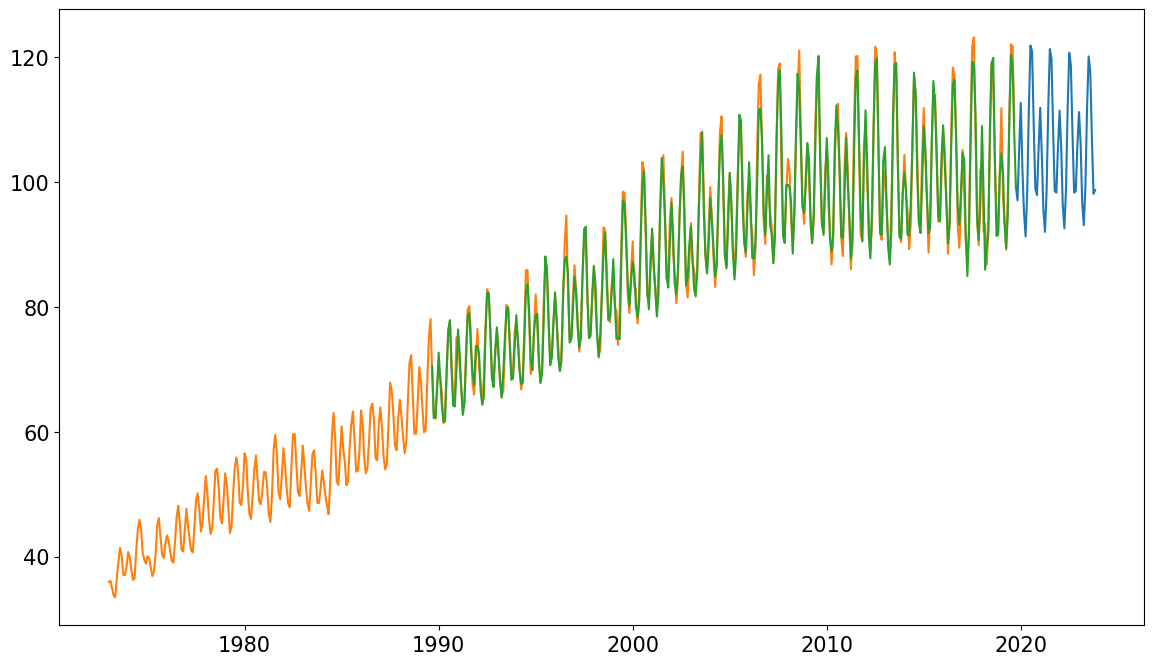

In [69]:
plt.plot(mydata)
plt.plot(data)
plt.plot(predictions)